# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.preprocessing import StandardScaler

# Cek versi MLflow 
print(f"Versi MLflow: {mlflow.__version__}")

Versi MLflow: 2.19.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat data
df = pd.read_csv('credit_risk_dataset_raw/credit_risk_dataset.csv')

# Menampilkan 5 baris pertama
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Cek Data

In [3]:
# Cek info tipe data dan jumlah baris
print("=== Info Dataset ===")
df.info()

# Cek jumlah missing value di setiap kolom
print("\n=== Jumlah Missing Value ===")
print(df.isnull().sum())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB

=== Jumla

## Cek Distribusi Target

/tmp/ipykernel_9/8151128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


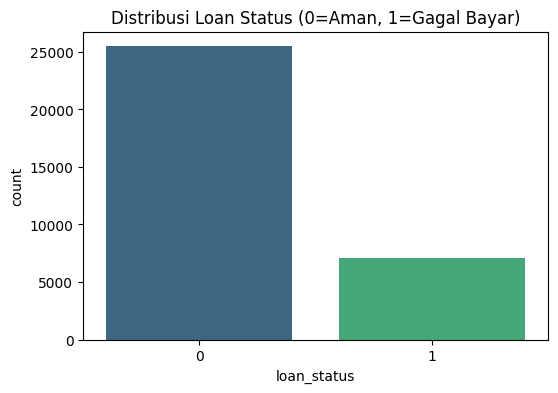

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [4]:
# Visualisasi Target
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Distribusi Loan Status (0=Aman, 1=Gagal Bayar)')
plt.show()

# Tampilkan persentase
print(df['loan_status'].value_counts(normalize=True) * 100)

## Cek Korelasi Antar Fitur

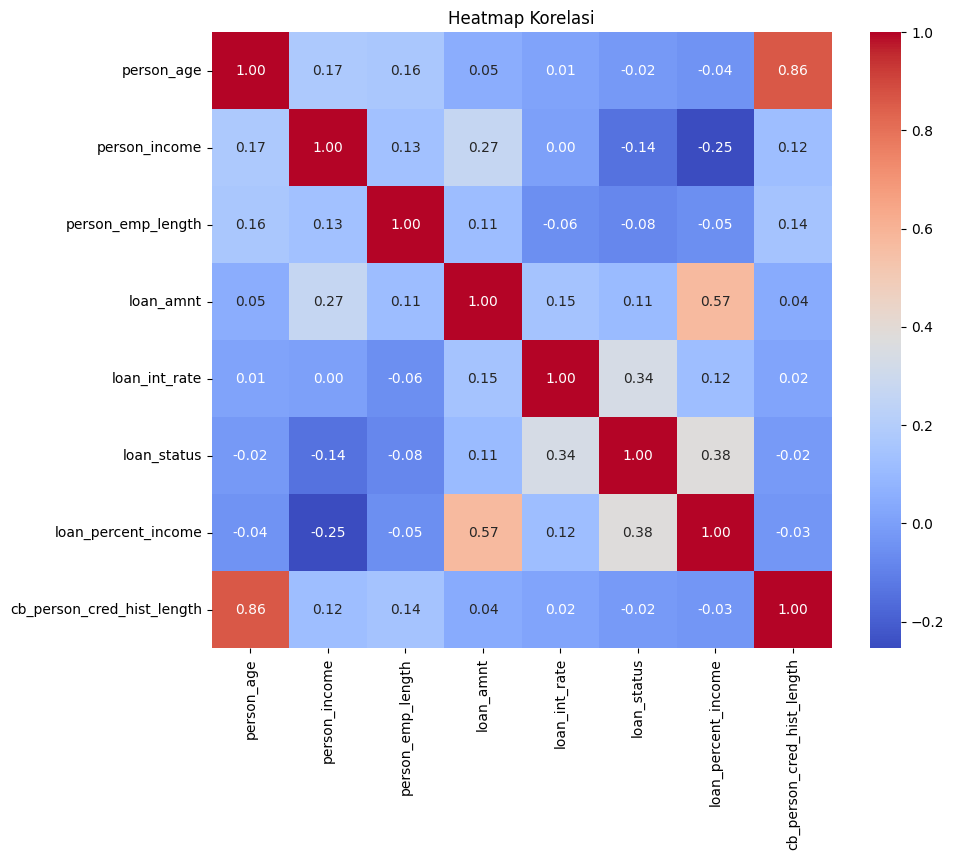

In [5]:
# Cek korelasi variabel numerik
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Hanya ambil kolom angka
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menangani Missing Value & Duplikat

In [6]:
# 1. Menangani Missing Values (Imputasi dengan Median)
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# 2. Menghapus Data Duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat yang dihapus: {jumlah_duplikat}")
df.drop_duplicates(inplace=True)

# Cek ulang apakah sudah bersih
print("\nSisa Missing Value:")
print(df.isnull().sum())

Jumlah data duplikat yang dihapus: 165

Sisa Missing Value:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


## Encoding (Mengubah Huruf jadi Angka)

In [7]:
# Encoding variabel kategorikal menggunakan One-Hot Encoding
# drop_first=True untuk menghindari multikolinearitas (redundansi data)
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

# Tampilkan data hasil encoding
print("Ukuran data setelah encoding:", df.shape)
df.head()

Ukuran data setelah encoding: (32416, 23)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


## Menangani Outlier


In [8]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Jumlah baris sebelum hapus outlier: {len(df)}")
df = remove_outliers(df, 'person_age')
df = remove_outliers(df, 'person_income')
print(f"Jumlah baris setelah hapus outlier: {len(df)}")

Jumlah baris sebelum hapus outlier: 32416
Jumlah baris setelah hapus outlier: 29457


## Normalisasi

In [9]:
# Inisialisasi Scaler
scaler = StandardScaler()

# Kita scale kolom numerik saja (yang bukan hasil encoding 0/1)
# Kolom numerik asli: person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
col_to_scale = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

print("Data berhasil dinormalisasi (Scaled)!")
df.head()

Data berhasil dinormalisasi (Scaled)!


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-1.047458,0.026538,30.937322,4.280797,1.630145,1,3.871543,-0.683236,False,False,...,False,True,False,False,False,True,False,False,False,True
1,-1.269414,-1.798447,0.097702,-1.373757,0.044860,0,-0.697832,-0.984959,False,True,...,False,False,False,True,False,False,False,False,False,False
2,-0.381591,-1.798447,-0.947709,-0.625360,0.606856,1,3.685038,-0.683236,False,False,...,True,False,False,False,True,False,False,False,False,False
3,-0.825502,0.266668,-0.163650,4.280797,1.373511,1,3.312028,-0.984959,False,False,...,True,False,False,False,True,False,False,False,False,False
4,-0.603546,-0.143400,0.881760,4.280797,1.061652,1,3.498533,-0.381514,False,False,...,True,False,False,False,True,False,False,False,False,True


## Simpan Data Bersih

In [10]:
# Simpan dataset yang sudah bersih
# Kita simpan di folder 'credit_risk_preprocessing' sesuai struktur folder awal
df.to_csv('credit_risk_preprocessing/credit_risk_clean.csv', index=False)

print("Data berhasil disimpan ke folder 'credit_risk_preprocessing'!")

Data berhasil disimpan ke folder 'credit_risk_preprocessing'!
